In [12]:
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import shapely

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
CRS_NYC = 'EPSG:2263'
CRS_LATLON = 'EPSG:4326'
DATA_DIR = '../data'
EXPORTS_DIR = f'{DATA_DIR}/citibike/exports'

## Select Bike Routes Within Citi Bike Service Area

<AxesSubplot:>

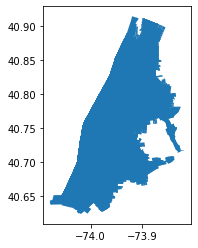

In [3]:
# Census tracts which are 2nd-order neighbors served by Citi Bike.
cb_area_gdf = gpd.read_file(f'{DATA_DIR}/geo/nyc_citibike.shp', crs=CRS_NYC)
cb_area_gdf = cb_area_gdf.to_crs(CRS_LATLON)
cb_area_gdf.plot()

<AxesSubplot:>

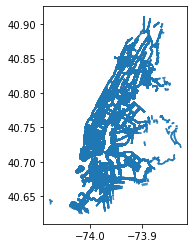

In [4]:
# All bike lanes/routes as of 2021.
lanes_gdf = gpd.read_file(f'{DATA_DIR}/geo/Routes_Merged_Simple.shp')
lanes_gdf = gpd.sjoin(lanes_gdf, cb_area_gdf, how='inner', op='intersects')
lanes_gdf.plot()

In [5]:
DATE_STRING = '202101'

In [7]:
lanes_gdf.set_crs(CRS_LATLON)
lanes_gdf.to_file(f'{DATA_DIR}/geo/lanes/' +
                  f'{DATE_STRING}_lanes_citibike_area.shp')

## Define Citi Bike Service Area as Single Polygon

In [10]:
cb_single_area_gdf = cb_area_gdf.dissolve()

In [24]:
cb_union_geom = shapely.ops.unary_union(cb_single_area_gdf.geometry)
cb_union_series = gpd.GeoSeries(cb_single_geom, crs=CRS_LATLON)

In [27]:
def plot(gdf):
    fig, ax = plt.subplots(figsize=(12, 12))
    gdf.plot(ax=ax)
    plt.show()

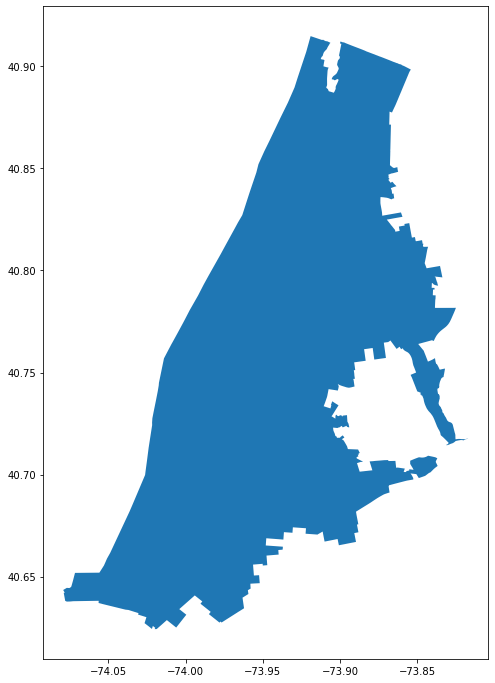

In [28]:
plot(cb_union_series)

In [26]:
cb_union_series.to_file(f'{DATA_DIR}/geo/citibike_service_area_polygon.shp')

## Define Citi Bike Bridge Service Area as Single Polygon

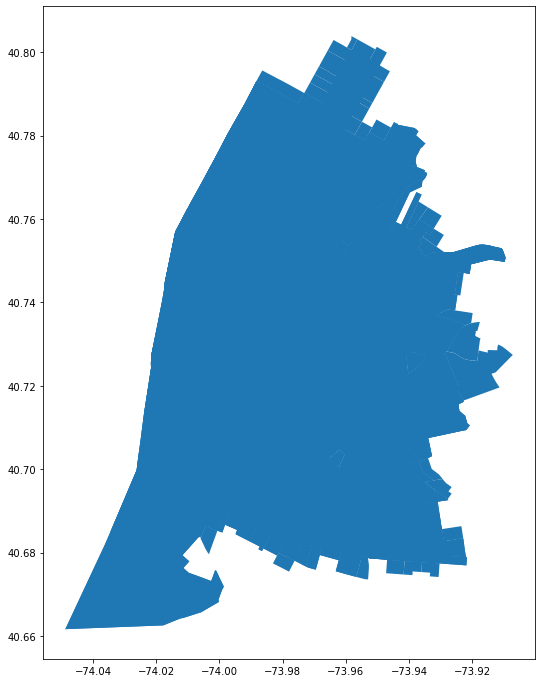

In [29]:
br_area_gdf = gpd.read_file(f'{DATA_DIR}/geo/bridge_area.shp', crs=CRS_LATLON)
plot(br_area_gdf)

In [ ]:
br_single_area_gdf = br_area_gdf.dissolve()
br_union_geom = shapely.ops.unary_union(br_single_area_gdf.geometry)
br_union_series = gpd.GeoSeries(br_single_geom, crs=CRS_LATLON)